<a href="https://colab.research.google.com/github/thaohung13/AI_W6_10_3_2023/blob/main/AI_W6_10_3_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


46.5814932526212


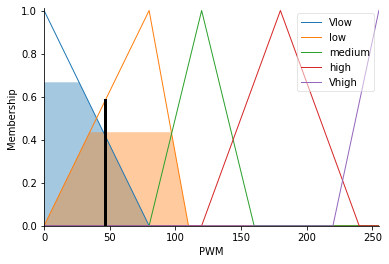

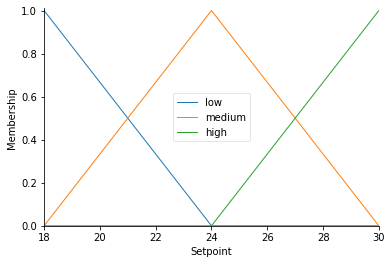

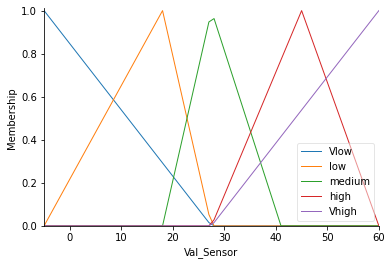

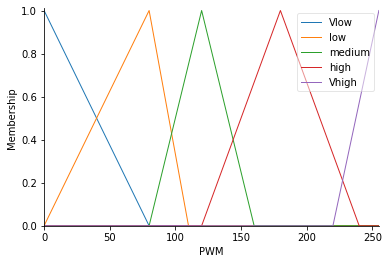

In [ ]:
#Điều khiển động cơ DCDC
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

#input
setpoint  = ctrl.Antecedent(np.arange(18,31,1),'Setpoint')
val_sensor = ctrl.Antecedent(np.arange(-5,61,1),'Val_Sensor')
#output
pwm = ctrl.Consequent(np.arange(0,256,1),'PWM')

setpoint ['low'] = fuzz.trimf(setpoint.universe,[18,18,24])
setpoint ['medium'] = fuzz.trimf(setpoint.universe,[18,24,30])
setpoint ['high'] = fuzz.trimf(setpoint.universe,[24,30,30])

val_sensor ['Vlow'] = fuzz.trimf(val_sensor.universe,[-5,-5,27.5])
val_sensor ['low'] = fuzz.trimf(val_sensor.universe,[-5,18,27.5])
val_sensor ['medium'] = fuzz.trimf(val_sensor.universe,[18,27.5,41])
val_sensor ['high'] = fuzz.trimf(val_sensor.universe,[27.5,45,60])
val_sensor ['Vhigh'] = fuzz.trimf(val_sensor.universe,[27.5,60,60])

pwm ['Vlow'] = fuzz.trimf(pwm.universe,[0,0,80])
pwm ['low'] = fuzz.trimf(pwm.universe,[0,80,110])
pwm ['medium'] = fuzz.trimf(pwm.universe,[80,120,160])
pwm ['high'] = fuzz.trimf(pwm.universe,[120,180,240])
pwm ['Vhigh'] = fuzz.trimf(pwm.universe,[220,255,255])

rule1 = ctrl.Rule(setpoint['low']&val_sensor['Vlow'],pwm['Vlow'])
rule2 = ctrl.Rule(setpoint['low']&val_sensor['low'],pwm['low'])
rule3 = ctrl.Rule(setpoint['low']&val_sensor['medium'],pwm['medium'])
rule4 = ctrl.Rule(setpoint['low']&val_sensor['high'],pwm['high'])
rule5 = ctrl.Rule(setpoint['low']&val_sensor['Vhigh'],pwm['Vhigh'])
rule6 = ctrl.Rule(setpoint['medium']&val_sensor['Vlow'],pwm['Vlow'])
rule7 = ctrl.Rule(setpoint['medium']&val_sensor['low'],pwm['low'])
rule8 = ctrl.Rule(setpoint['medium']&val_sensor['medium'],pwm['medium'])
rule9 = ctrl.Rule(setpoint['medium']&val_sensor['high'],pwm['high'])
rule10 = ctrl.Rule(setpoint['medium']&val_sensor['Vhigh'],pwm['Vhigh'])
rule11 = ctrl.Rule(setpoint['high']&val_sensor['Vlow'],pwm['Vlow'])
rule12 = ctrl.Rule(setpoint['high']&val_sensor['low'],pwm['low'])
rule13 = ctrl.Rule(setpoint['high']&val_sensor['medium'],pwm['medium'])
rule14 = ctrl.Rule(setpoint['high']&val_sensor['high'],pwm['high'])
rule15 = ctrl.Rule(setpoint['high']&val_sensor['Vhigh'],pwm['Vhigh'])

pwming_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
pwming = ctrl.ControlSystemSimulation(pwming_ctrl)
pwming.input['Setpoint'] = 28
pwming.input['Val_Sensor'] = 5
pwming.compute()
print(pwming.output['PWM'])
pwm.view(sim = pwming)

setpoint.view()
val_sensor.view()
pwm.view()

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

#input
L  = ctrl.Antecedent(np.arange(0,1.6,0.1),'L')
C  = ctrl.Antecedent(np.arange(0,1.6,0.1),'C')
R  = ctrl.Antecedent(np.arange(0,1.6,0.1),'R')

#output
RC = ctrl.Consequent(np.arange(-91,0,1),'RC')
LC = ctrl.Consequent(np.arange(0,91,1),'LC')
PWM1 = ctrl.Consequent(np.arange(0,256,1),'PWM1')
PWM2 = ctrl.Consequent(np.arange(0,256,1),'PWM2')



